In [99]:
# Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
#Classifiers we will be evaluating
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
#Model Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc , roc_auc_score

#Train Test data prepration and parameter tuning 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [2]:
#Load data from csv file into a data frame
iris_data = pd.read_csv("iris.csv")

In [3]:
#First 10 lines of our data
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
#Get statistics about the data
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
#check if there are any empty values
iris_data[iris_data.isnull().any(axis = 1)]

,sepal_length,sepal_width,petal_length,petal_width,species


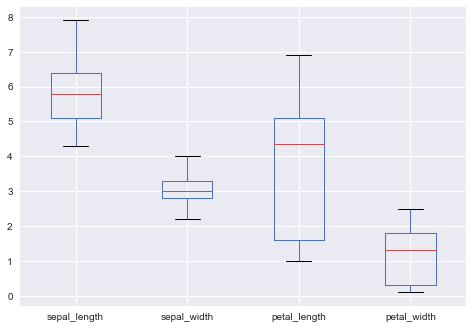

In [5]:
# box and whisker plots to show upper , lower quartile and median
iris_data.plot(kind='box')
plt.show()

In [6]:
#Finds counts of each iris flower species
iris_data.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

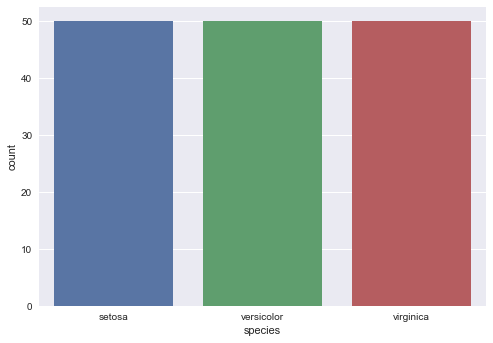

In [7]:
# Plot the counts for each species
sns.countplot(x='species',data=iris_data)
plt.show()


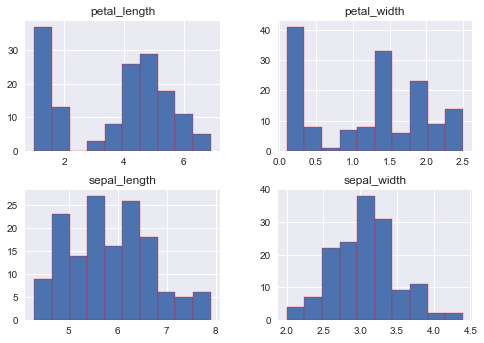

In [8]:
#Plot histograms for each feature
iris_data.hist(edgecolor='red')
plt.show()

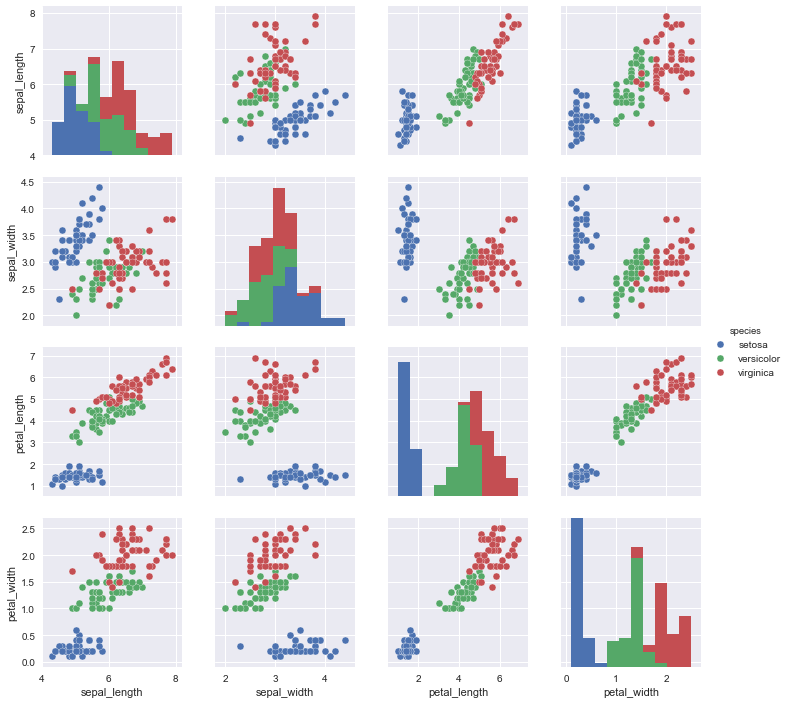

In [9]:
# Plot the pairwise relationship between features
sns.pairplot(iris_data, hue="species")
#sns.pairplot(iris_data)
plt.show()

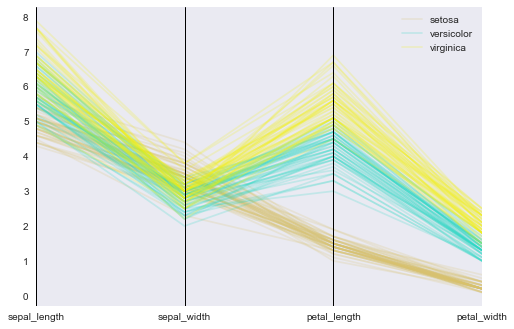

In [11]:
# To view multiple features together you can plot a parallel_corordinates plot
parallel_coordinates(iris_data, 'species', alpha=0.2)
plt.show()

In [12]:
#Extract only the numeric features (excluse the labels) to be passed to K-Means
iris_features = iris_data[['sepal_length','sepal_width','petal_length','petal_width']]

In [14]:
# validate results
iris_features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
labels = iris_data.species

In [25]:
# Convert text labels to numeric 0,1,2 for each flower type
num_labels = pd.factorize(iris_data['species'])[0]

In [26]:
# check results
num_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [34]:
#Perform train test split with Test = 25% of data 
X_train, X_test, y_train, y_test = train_test_split(iris_features,num_labels, test_size = 0.25)


In [35]:
print(X_train.shape , X_test.shape ,y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [38]:
# Initialize Random Forest Classsifer
rf = RandomForestClassifier(n_jobs=2, random_state=0)

In [40]:
# Fit tt Training Data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
# predict class labels
pred_labels_ = rf.predict(X_test)
print(pred_labels_)

[1 0 1 2 2 0 0 0 2 1 0 1 0 0 1 2 0 2 2 0 2 1 1 2 1 0 0 2 0 1 2 2 0 0 1 1 1
 0]


In [60]:
# predict probabilities
probas_ = rf.predict_proba(X_test)
probas_

array([[ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.9,  0.1],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.2,  0.8],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.5,  0.5],
       [ 0. ,  0.1,  0.9],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.1,  0.9],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.1,  0.9],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.2,  0.8],
       [ 0. ,  0.9,  0.1],
       [ 1. ,  0. ,  0. ],
       [ 0.9,  0. ,  0.1],
       [ 0. ,  0.2,  0.8],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.9,  0.1],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.1,  0.9],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.5,  0.5],
 

In [49]:
# Get accuracy score
acc = accuracy_score(y_test,pred_labels_)
acc

0.97368421052631582

In [57]:
# Get F1 accuracy score
f1 = f1_score(y_test,pred_labels_,average = 'weighted')
f1

0.97368421052631582

In [64]:
# Create confusion matrix
pd.crosstab(y_test, pred_labels_, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,15,0,0
1,0,11,0
2,0,1,11


In [91]:
#Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1] , pos_label = 1)
aucc = auc(fpr, tpr)
aucc

0.99831649831649827

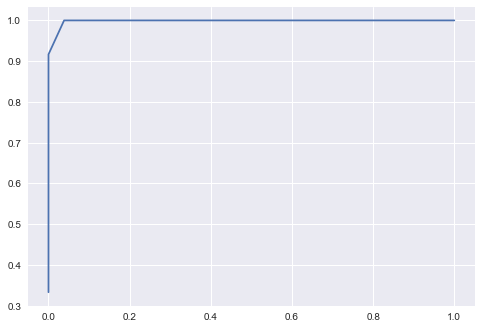

In [89]:
# Plot ROC
plt.plot(fpr,tpr)
plt.show()

In [68]:
# View a list of the features and their importance scores
list(zip(X_train, rf.feature_importances_))

[('sepal_length', 0.10192623559067363),
 ('sepal_width', 0.041017900170013513),
 ('petal_length', 0.36319550512315601),
 ('petal_width', 0.49386035911615683)]

In [97]:
#Now lets run all the models (non-tree bases) we want to evaluate
model_names = ['LogR','LDA','QDA','GNB','KNN','AdaBC','SVM-l','SVM-RBF']
models = [
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    GaussianNB(),
    KNeighborsClassifier(5),
    AdaBoostClassifier(),
    SVC(kernel="linear", C=0.02),
    SVC(gamma=2, C=1),
   ]

In [105]:
#Run cross val score acorss all thes models. Note: This can take a few mins
scores = []
for model_name, model in zip(model_names,models):
    score = cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy',n_jobs = -1).mean()
    print("Accuracy for",model_name,":", score)
    scores.append(score)

Accuracy for LogR : 0.933838383838
Accuracy for LDA : 0.973484848485
Accuracy for QDA : 0.973484848485
Accuracy for GNB : 0.937727272727
Accuracy for KNN : 0.917525252525
Accuracy for AdaBC : 0.917525252525
Accuracy for SVM-l : 0.927373737374
Accuracy for SVM-RBF : 0.937727272727


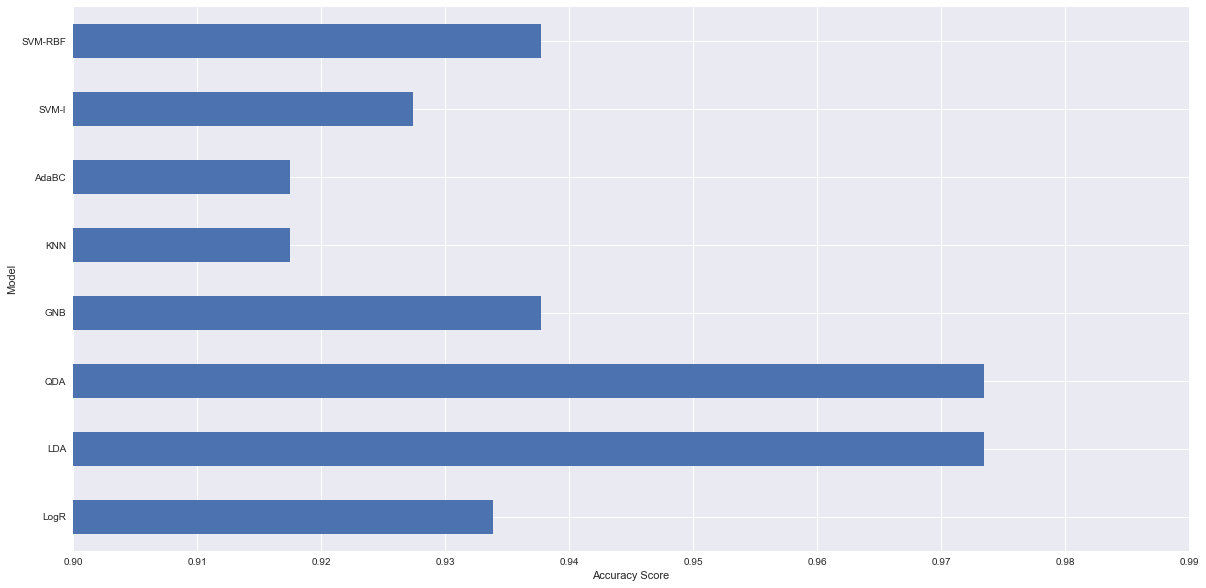

In [107]:
# Plot comparision results across all Classifiers
plt.figure(figsize = (20,10))
pd.Series(scores,model_names).plot(kind = "barh",  xlim = (0.9,0.99) )
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.show()